In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

# Loading the database:

In [2]:
covid = pd.read_csv('../input/novel-corona-virus-2019-dataset/covid_19_data.csv')
covid

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
85633,85634,08/12/2020,Zaporizhia Oblast,Ukraine,2020-08-13 04:29:15,971.0,22.0,680.0
85634,85635,08/12/2020,Zeeland,Netherlands,2020-08-13 04:29:15,950.0,69.0,0.0
85635,85636,08/12/2020,Zhejiang,Mainland China,2020-08-13 04:29:15,1275.0,1.0,1268.0
85636,85637,08/12/2020,Zhytomyr Oblast,Ukraine,2020-08-13 04:29:15,2215.0,48.0,1574.0


I will create a new dataframe with only datas baout Brazil (it's my country) to make some EDA

In [3]:
df_BR = covid[covid['Country/Region'] == 'Brazil']
df_BR

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
82,83,01/23/2020,NaN,Brazil,1/23/20 17:00,0.0,0.0,0.0
2455,2456,02/26/2020,NaN,Brazil,2020-02-26T23:53:02,1.0,0.0,0.0
2559,2560,02/27/2020,NaN,Brazil,2020-02-26T23:53:02,1.0,0.0,0.0
2668,2669,02/28/2020,NaN,Brazil,2020-02-26T23:53:02,1.0,0.0,0.0
2776,2777,02/29/2020,NaN,Brazil,2020-02-29T21:03:05,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
85489,85490,08/12/2020,Roraima,Brazil,2020-08-13 04:29:15,37579.0,555.0,9125.0
85506,85507,08/12/2020,Santa Catarina,Brazil,2020-08-13 04:29:15,112401.0,1637.0,99781.0
85508,85509,08/12/2020,Sao Paulo,Brazil,2020-08-13 04:29:15,655181.0,25869.0,453612.0
85514,85515,08/12/2020,Sergipe,Brazil,2020-08-13 04:29:15,65865.0,1653.0,47709.0


Let's see the ``ObservationDate`` and the ``Confirmed`` cases in a graph:

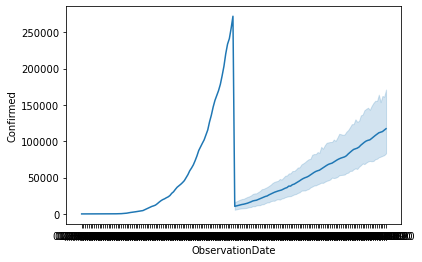

In [4]:
sns.lineplot(df_BR['ObservationDate'], df_BR['Confirmed']);

Look how interesting, as the days go by the cases increase but when it exceeds the 250000 mark, there is a significant drop.
* Is this drop the result of a quarantine or more stringent measures?
* Was it during the period when the [president of the country decided that he would stop reporting the total number of cases](https://oglobo.globo.com/sociedade/governo-esconde-totais-de-mortes-casos-da-covid-19-tira-site-do-ar-1-24466314) and did this have an impact on the results?

But right after the sharp drop, there is a resumption of the growth of cases, even in a more controlled way than before the declination of the line.

I will create a new dataframe but now the data `` ObservationDate``, `` Confirmed``, `Deaths` and `Recovered` grouped together

In [5]:
df_sum = covid.groupby('ObservationDate').agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'}).reset_index()
df_sum

,ObservationDate,Confirmed,Deaths,Recovered
0,01/22/2020,555.0,17.0,28.0
1,01/23/2020,653.0,18.0,30.0
2,01/24/2020,941.0,26.0,36.0
3,01/25/2020,1438.0,42.0,39.0
4,01/26/2020,2118.0,56.0,52.0
...,...,...,...,...
199,08/08/2020,19637506.0,726781.0,11939109.0
200,08/09/2020,19861683.0,731326.0,12115825.0
201,08/10/2020,20089624.0,736191.0,12280520.0
202,08/11/2020,20343589.0,742615.0,12585473.0


Let's create a comparative chart between `` Confirmed``, `` Deaths`` and `` Recovered``

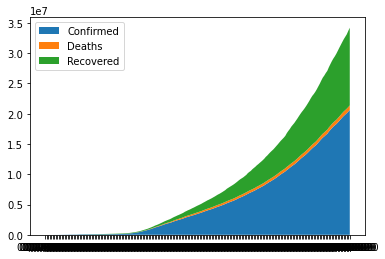

In [6]:
plt.stackplot(df_sum['ObservationDate'], [df_sum['Confirmed'], df_sum['Deaths'], df_sum['Recovered']],
              labels = ['Confirmed', 'Deaths', 'Recovered'])
plt.legend(loc = 'upper left')

We can see in these graphs that the number of deaths is insignificant when compared to the number of confirmed cases and those recovered. Despite the delicate periods that the world has been going through, the number of recovered people exceeds the number of deaths, which is very good even the number of confirmed cases continuing to grow and being very high.

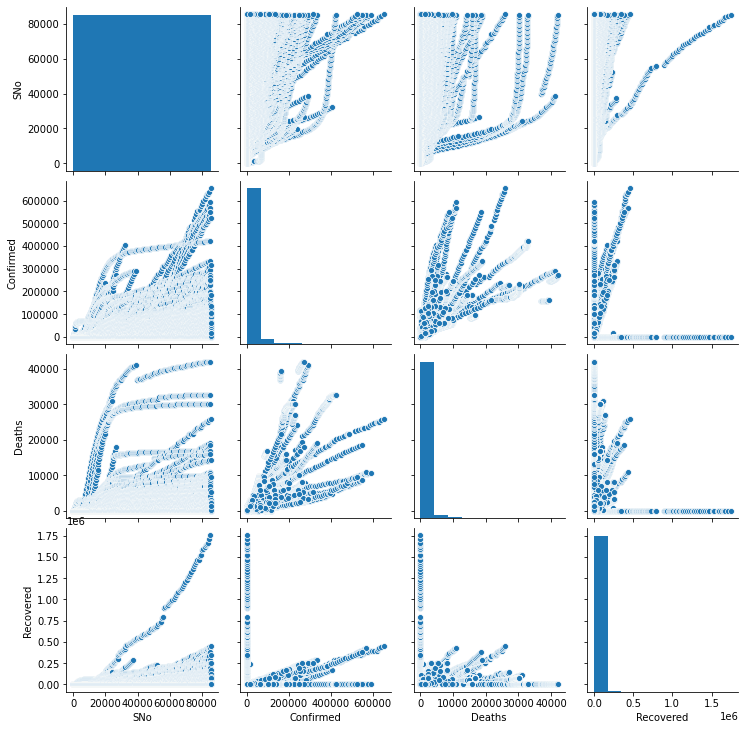

In [7]:
sns.pairplot(covid)

# Loading another database
This database brings information from patients

In [8]:
covid_line_list = pd.read_csv('../input/novel-corona-virus-2019-dataset/COVID19_line_list_data.csv')
covid_line_list

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,...,recovered,symptom,source,link,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,...,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,...,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,1/21/2020,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,...,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,1081,2.0,2/25/2020,NaN,"new COVID-19 patient confirmed in Austria: 24,...",Innsbruck,Austria,NaN,24.0,NaN,...,0,NaN,Jakarta Post,https://www.thejakartapost.com/news/2020/02/25...,NaN,NaN,NaN,NaN,NaN,NaN
1081,1082,1.0,2/24/2020,NaN,new COVID-19 patient confirmed in Afghanistan:...,Afghanistan,Afghanistan,NaN,35.0,NaN,...,0,NaN,Fox News,https://www.foxnews.com/health/afghanistan-fir...,NaN,NaN,NaN,NaN,NaN,NaN
1082,1083,1.0,2/26/2020,NaN,new COVID-19 patient confirmed in Algeria: mal...,Algeria,Algeria,male,NaN,NaN,...,0,NaN,South China Morning Post,https://www.scmp.com/news/china/society/articl...,NaN,NaN,NaN,NaN,NaN,NaN
1083,1084,1.0,2/25/2020,NaN,new COVID-19 patient confirmed in Croatia: mal...,Croatia,Croatia,male,NaN,NaN,...,0,NaN,Reuters,https://www.reuters.com/article/us-croatia-cor...,NaN,NaN,NaN,NaN,NaN,NaN


Analyzing patients by `` age``:

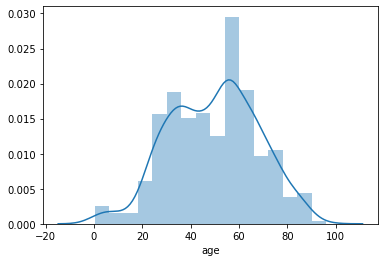

In [9]:
sns.distplot(covid_line_list['age'])

We can see from the graph above that the highest levels of virus infection are between 25 and 70 years old. It is very clear that we have a very high peak in those people aged approximately 60 to 70 years, people including part of the risk group for being elderly.

# Predicting the deaths by COVID-19:

In [10]:
deaths = pd.read_csv('../input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv')
deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,1288,1288,1294,1298,1307,1312,1312,1328,1344,1354
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,172,176,182,188,189,193,199,200,205,208
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,1239,1248,1261,1273,1282,1293,1302,1312,1322,1333
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,52,52,52,52,52,52,52,52,52,53
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,58,59,62,64,67,70,75,78,80,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,84,86,89,92,94,96,97,100,104,105
262,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,499,506,508,508,512,512,515,518,523,528
264,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,171,173,176,199,200,203,235,241,241,246


Let's see about the Brazil deaths

In [11]:
deaths[deaths['Country/Region'] == 'Brazil']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20
30,NaN,Brazil,-14.235,-51.9253,0,0,0,0,0,0,...,94665,95819,97256,98493,99572,100477,101049,101752,103026,104201


In Brazil, cases grow in a short period of time

As the goal is to predict the number of deaths, we will create a variable called the ``columns`` where we will keep only the date.

In [12]:
columns = deaths.keys()
columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '8/3/20', '8/4/20', '8/5/20', '8/6/20', '8/7/20', '8/8/20', '8/9/20',
       '8/10/20', '8/11/20', '8/12/20'],
      dtype='object', length=208)

The columns that start the dates is number 4, so let's recreate the dataframe `` deaths`` from the fourth column. It will take from the fourth to the last column and the number of deaths on the dates will be shown

In [13]:
deaths = deaths.loc[:, columns[4]:columns[-1]]
deaths

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20
0,0,0,0,0,0,0,0,0,0,0,...,1288,1288,1294,1298,1307,1312,1312,1328,1344,1354
1,0,0,0,0,0,0,0,0,0,0,...,172,176,182,188,189,193,199,200,205,208
2,0,0,0,0,0,0,0,0,0,0,...,1239,1248,1261,1273,1282,1293,1302,1312,1322,1333
3,0,0,0,0,0,0,0,0,0,0,...,52,52,52,52,52,52,52,52,52,53
4,0,0,0,0,0,0,0,0,0,0,...,58,59,62,64,67,70,75,78,80,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0,0,0,0,0,0,0,0,0,0,...,84,86,89,92,94,96,97,100,104,105
262,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
263,0,0,0,0,0,0,0,0,0,0,...,499,506,508,508,512,512,515,518,523,528
264,0,0,0,0,0,0,0,0,0,0,...,171,173,176,199,200,203,235,241,241,246


Now we can see the number of deaths on their date of occurrence. Let's see how many months we have in this database:

In [14]:
len(deaths.keys())

204

We have data of just over 6.5 months. Now let's add the number of deaths that occurred on each day:

In [15]:
deaths['1/22/20'].sum()

17

We had a total of 17 deaths in this day in the world

In [16]:
deaths['8/12/20'].sum()

749358

In [17]:
#creating the variable:
dates = deaths.keys()
y = []
for i in dates:
    y.append(deaths[i].sum())

In [18]:
print(y)

[17, 18, 26, 42, 56, 82, 131, 133, 171, 213, 259, 362, 426, 492, 564, 634, 719, 806, 906, 1013, 1113, 1118, 1371, 1523, 1666, 1770, 1868, 2008, 2123, 2248, 2252, 2459, 2470, 2630, 2710, 2771, 2814, 2873, 2942, 2996, 3085, 3160, 3255, 3348, 3460, 3559, 3803, 3987, 4266, 4611, 4916, 5413, 5830, 6471, 7151, 7956, 8855, 9962, 11442, 13149, 14850, 16772, 19047, 21828, 24843, 28370, 32069, 35549, 39727, 44602, 50183, 56515, 62522, 68406, 73490, 79393, 87364, 94166, 101872, 109196, 115343, 121153, 126978, 133930, 142302, 149645, 158589, 165120, 169737, 175216, 182420, 189220, 196101, 202812, 208436, 212356, 217047, 223533, 230316, 236306, 241505, 246966, 250444, 254592, 260478, 267052, 272477, 278066, 282340, 285921, 289396, 294953, 300194, 305471, 310706, 314870, 318205, 321502, 326290, 331186, 335983, 341271, 345269, 348415, 349603, 353816, 359038, 363749, 368496, 372662, 375555, 378628, 383461, 389054, 394217, 398972, 402860, 405598, 409303, 414230, 419436, 424217, 428524, 432774, 436159, 

variable ``y`` is in `` list`` format and to use Machine Learning algorithms it is necessary to transform them into `` array``

In [19]:
y = np.array(y).reshape(-1,1) #will be transformed into matrix format
y

array([[    17],
       [    18],
       [    26],
       [    42],
       [    56],
       [    82],
       [   131],
       [   133],
       [   171],
       [   213],
       [   259],
       [   362],
       [   426],
       [   492],
       [   564],
       [   634],
       [   719],
       [   806],
       [   906],
       [  1013],
       [  1113],
       [  1118],
       [  1371],
       [  1523],
       [  1666],
       [  1770],
       [  1868],
       [  2008],
       [  2123],
       [  2248],
       [  2252],
       [  2459],
       [  2470],
       [  2630],
       [  2710],
       [  2771],
       [  2814],
       [  2873],
       [  2942],
       [  2996],
       [  3085],
       [  3160],
       [  3255],
       [  3348],
       [  3460],
       [  3559],
       [  3803],
       [  3987],
       [  4266],
       [  4611],
       [  4916],
       [  5413],
       [  5830],
       [  6471],
       [  7151],
       [  7956],
       [  8855],
       [  9962],
       [ 11442

Our x variable to get the predict of the deaths

In [20]:
x = np.arange(len(dates)).reshape(-1,1) #will generate the number of dates according to the size of the "dates"
x

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

Let's create a new `` forecast`` variable so that we can make the future forecast for the next few days:

In [21]:
forecast = np.arange(len(dates) + 15).reshape(-1,1)
forecast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [22]:
x.shape, y.shape, forecast.shape 

((204, 1), (204, 1), (219, 1))

**Training the model**

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.10, shuffle = False)

In [24]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

As we are using the `` degree = 2`` we have to modify our training data to place these new 2 characteristics

In [25]:
X_train.shape, X_test.shape, X_train_poly.shape, X_test_poly.shape

((183, 1), (21, 1), (183, 3), (21, 3))

In [26]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_poly, Y_train)

LinearRegression()

**The prediction**

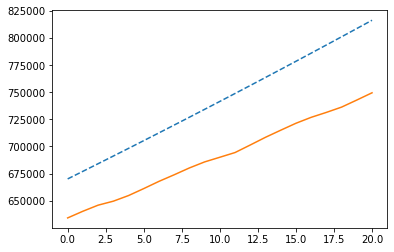

In [27]:
poly_pred = lr.predict(X_test_poly)
plt.plot(poly_pred, linestyle = 'dashed')
plt.plot(Y_test)

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('MAE:', mean_absolute_error(poly_pred, Y_test))
print('MSE:', mean_squared_error(poly_pred, Y_test))
print('RMSE:', np.sqrt(mean_absolute_error(poly_pred, Y_test)))

MAE: 51044.5898595766
MSE: 2692677917.3236284
RMSE: 225.93049785183186


Now let's use the ``forecast`` variable to make the forecast

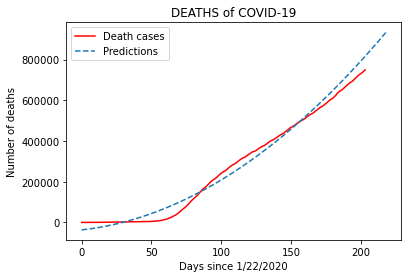

In [29]:
X_train_all = poly.transform(forecast)
pred_all = lr.predict(X_train_all)

plt.plot(forecast[:-15], y, color='red')
plt.plot(forecast, pred_all, linestyle='dashed')
plt.title('DEATHS of COVID-19')
plt.xlabel('Days since 1/22/2020')
plt.ylabel('Number of deaths')
plt.legend(['Death cases', 'Predictions']);

# The prediction of the confirmed cases:

In [30]:
confirmed = pd.read_csv('../input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv')
confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,36747,36782,36829,36896,37015,37054,37054,37162,37269,37345
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,5620,5750,5889,6016,6151,6275,6411,6536,6676,6817
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,31972,32504,33055,33626,34155,34693,35160,35712,36204,36699
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,937,939,939,944,955,955,955,963,963,977
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1280,1344,1395,1483,1538,1572,1672,1679,1735,1762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,12541,12770,13065,13398,13722,13928,14208,14510,14875,15184
262,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1734,1760,1763,1768,1796,1797,1804,1832,1831,1841
264,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,6580,6793,7022,7164,7486,7903,8085,8210,8275,8501


In [31]:
confirmed[confirmed['Country/Region'] == 'Brazil']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20
30,NaN,Brazil,-14.235,-51.9253,0,0,0,0,0,0,...,2750318,2801921,2859073,2912212,2962442,3012412,3035422,3057470,3109630,3164785


In [32]:
columns1 = confirmed.keys()
columns1

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '8/3/20', '8/4/20', '8/5/20', '8/6/20', '8/7/20', '8/8/20', '8/9/20',
       '8/10/20', '8/11/20', '8/12/20'],
      dtype='object', length=208)

In [33]:
confirmed = confirmed.loc[:, columns1[4]:columns1[-1]]
confirmed

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20
0,0,0,0,0,0,0,0,0,0,0,...,36747,36782,36829,36896,37015,37054,37054,37162,37269,37345
1,0,0,0,0,0,0,0,0,0,0,...,5620,5750,5889,6016,6151,6275,6411,6536,6676,6817
2,0,0,0,0,0,0,0,0,0,0,...,31972,32504,33055,33626,34155,34693,35160,35712,36204,36699
3,0,0,0,0,0,0,0,0,0,0,...,937,939,939,944,955,955,955,963,963,977
4,0,0,0,0,0,0,0,0,0,0,...,1280,1344,1395,1483,1538,1572,1672,1679,1735,1762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0,0,0,0,0,0,0,0,0,0,...,12541,12770,13065,13398,13722,13928,14208,14510,14875,15184
262,0,0,0,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
263,0,0,0,0,0,0,0,0,0,0,...,1734,1760,1763,1768,1796,1797,1804,1832,1831,1841
264,0,0,0,0,0,0,0,0,0,0,...,6580,6793,7022,7164,7486,7903,8085,8210,8275,8501


In [34]:
confirmed['1/22/20'].sum(), confirmed['8/12/20'].sum()

(555, 20620847)

In [35]:
dates1 = confirmed.keys()
y_c = []
for i in dates1:
    y_c.append(confirmed[i].sum())

In [36]:
print(y_c)

[555, 654, 941, 1434, 2118, 2927, 5578, 6166, 8234, 9927, 12038, 16787, 19887, 23898, 27643, 30802, 34395, 37129, 40159, 42768, 44810, 45228, 60381, 66908, 69050, 71234, 73269, 75151, 75651, 76211, 76840, 78601, 78981, 79545, 80398, 81375, 82739, 84116, 86011, 88395, 90369, 92947, 95246, 98037, 101980, 106018, 109972, 113872, 118896, 126559, 132309, 146716, 157824, 168973, 183640, 199487, 219083, 247002, 276612, 308921, 342341, 384508, 425675, 476494, 539391, 603791, 671447, 731024, 795666, 872076, 948290, 1029704, 1112859, 1193322, 1265035, 1337712, 1414580, 1498360, 1585025, 1672620, 1749575, 1846390, 1916063, 1985901, 2066740, 2163426, 2251145, 2325103, 2405607, 2478960, 2554241, 2631027, 2720027, 2806972, 2891910, 2964853, 3033572, 3108878, 3185925, 3269608, 3356663, 3438339, 3515957, 3592058, 3672050, 3762073, 3851158, 3942676, 4028522, 4104768, 4181009, 4264584, 4349360, 4446448, 4542815, 4638237, 4716758, 4805049, 4901442, 5004471, 5110805, 5217705, 5322994, 5418320, 5505283, 55

In [37]:
y_c = np.array(y_c).reshape(-1,1)
y_c

array([[     555],
       [     654],
       [     941],
       [    1434],
       [    2118],
       [    2927],
       [    5578],
       [    6166],
       [    8234],
       [    9927],
       [   12038],
       [   16787],
       [   19887],
       [   23898],
       [   27643],
       [   30802],
       [   34395],
       [   37129],
       [   40159],
       [   42768],
       [   44810],
       [   45228],
       [   60381],
       [   66908],
       [   69050],
       [   71234],
       [   73269],
       [   75151],
       [   75651],
       [   76211],
       [   76840],
       [   78601],
       [   78981],
       [   79545],
       [   80398],
       [   81375],
       [   82739],
       [   84116],
       [   86011],
       [   88395],
       [   90369],
       [   92947],
       [   95246],
       [   98037],
       [  101980],
       [  106018],
       [  109972],
       [  113872],
       [  118896],
       [  126559],
       [  132309],
       [  146716],
       [  15

In [38]:
x_c = np.arange(len(dates1)).reshape(-1,1)
x_c

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [39]:
forecast_c = np.arange(len(dates1) + 15).reshape(-1,1)
forecast_c

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [40]:
x_c.shape, y_c.shape, forecast_c.shape 

((204, 1), (204, 1), (219, 1))

**Training the model**

In [41]:
X_train_c, X_test_c, Y_train_c, Y_test_c = train_test_split(x_c, y_c, test_size = 0.10, shuffle = False)

In [42]:
poly_c = PolynomialFeatures(degree = 4)
X_train_poly_c = poly_c.fit_transform(X_train_c)
X_test_poly_c = poly_c.transform(X_test_c)

In [43]:
X_train_c.shape, X_test_c.shape, X_train_poly_c.shape, X_test_poly_c.shape

((183, 1), (21, 1), (183, 5), (21, 5))

In [44]:
lr_c = LinearRegression()
lr_c.fit(X_train_poly_c, Y_train_c)

LinearRegression()

**The prediction**

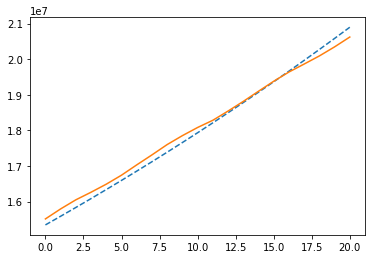

In [45]:
poly_pred_c = lr_c.predict(X_test_poly_c)
plt.plot(poly_pred_c, linestyle = 'dashed')
plt.plot(Y_test_c)

In [46]:
print('MAE:', mean_absolute_error(poly_pred_c, Y_test_c))
print('MSE:', mean_squared_error(poly_pred_c, Y_test_c))
print('RMSE:', np.sqrt(mean_absolute_error(poly_pred_c, Y_test_c)))

MAE: 143027.33817490883
MSE: 26270885523.13014
RMSE: 378.1895532334398


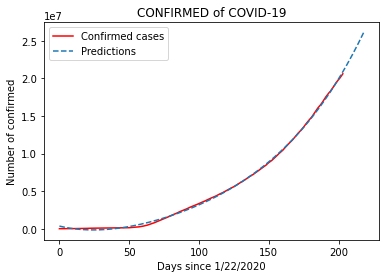

In [47]:
X_train_all_c = poly_c.transform(forecast_c)
pred_all_c = lr_c.predict(X_train_all_c)

plt.plot(forecast_c[:-15], y_c, color='red')
plt.plot(forecast_c, pred_all_c, linestyle='dashed')
plt.title('CONFIRMED of COVID-19')
plt.xlabel('Days since 1/22/2020')
plt.ylabel('Number of confirmed')
plt.legend(['Confirmed cases', 'Predictions']);

# The prediction of the recovered

In [48]:
recovered = pd.read_csv('../input/novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv')
recovered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,25669,25669,25742,25840,25903,25960,25960,26228,26415,26694
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,3031,3031,3123,3155,3227,3268,3342,3379,3480,3552
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,21901,22375,22802,23238,23667,24083,24506,24920,25263,25627
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,821,825,825,828,839,839,839,839,839,855
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,476,503,506,520,544,564,567,569,575,577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,5390,6419,6618,6907,7210,7706,7945,8045,8181,8369
249,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,8,8,8,8,8,8,8,8,8,8
250,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,863,863,894,898,907,910,913,915,915,937
251,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,4701,5109,5667,5786,6264,6431,6698,6802,7004,7233


In [49]:
recovered[recovered['Country/Region'] == 'Brazil']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20
30,NaN,Brazil,-14.235,-51.9253,0,0,0,0,0,0,...,2098976,2157484,2190361,2230542,2272299,2321537,2356983,2390830,2449338,2506228


In [50]:
columns2 = recovered.keys()
columns2

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '8/3/20', '8/4/20', '8/5/20', '8/6/20', '8/7/20', '8/8/20', '8/9/20',
       '8/10/20', '8/11/20', '8/12/20'],
      dtype='object', length=208)

In [51]:
recovered = recovered.loc[:, columns2[4]:columns2[-1]]
recovered

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20
0,0,0,0,0,0,0,0,0,0,0,...,25669,25669,25742,25840,25903,25960,25960,26228,26415,26694
1,0,0,0,0,0,0,0,0,0,0,...,3031,3031,3123,3155,3227,3268,3342,3379,3480,3552
2,0,0,0,0,0,0,0,0,0,0,...,21901,22375,22802,23238,23667,24083,24506,24920,25263,25627
3,0,0,0,0,0,0,0,0,0,0,...,821,825,825,828,839,839,839,839,839,855
4,0,0,0,0,0,0,0,0,0,0,...,476,503,506,520,544,564,567,569,575,577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,0,0,0,0,0,0,0,0,0,0,...,5390,6419,6618,6907,7210,7706,7945,8045,8181,8369
249,0,0,0,0,0,0,0,0,0,0,...,8,8,8,8,8,8,8,8,8,8
250,0,0,0,0,0,0,0,0,0,0,...,863,863,894,898,907,910,913,915,915,937
251,0,0,0,0,0,0,0,0,0,0,...,4701,5109,5667,5786,6264,6431,6698,6802,7004,7233


In [52]:
recovered['1/22/20'].sum(), recovered['8/12/20'].sum()

(28, 12826815)

In [53]:
dates2 = recovered.keys()
y_r = []
for i in dates2:
    y_r.append(recovered[i].sum())

In [54]:
print(y_r)

[28, 30, 36, 39, 52, 61, 107, 126, 143, 222, 284, 472, 623, 852, 1124, 1487, 2011, 2616, 3244, 3946, 4683, 5150, 6295, 8058, 9395, 10865, 12583, 14352, 16121, 18177, 18890, 22886, 23394, 25227, 27905, 30384, 33277, 36711, 39782, 42716, 45602, 48228, 51170, 53796, 55865, 58359, 60694, 62493, 64404, 67002, 68324, 70251, 72622, 76032, 78086, 80838, 83321, 84958, 87403, 91670, 97885, 98351, 107992, 113775, 122145, 130921, 139424, 148891, 164337, 177825, 192918, 209967, 225415, 245832, 259672, 276252, 299643, 328359, 353707, 375509, 401766, 421180, 448347, 473436, 510106, 540926, 567049, 590968, 622623, 644613, 679456, 709881, 738661, 788712, 816491, 845096, 872865, 906136, 948318, 1013284, 1051537, 1092416, 1124732, 1158819, 1195359, 1241365, 1280833, 1317383, 1370933, 1404527, 1451521, 1488542, 1544398, 1584114, 1632122, 1688714, 1729621, 1782542, 1834647, 1893575, 1944840, 2053491, 2108462, 2163902, 2227625, 2282839, 2346232, 2413089, 2490435, 2560888, 2637208, 2692105, 2796228, 2875332,

In [55]:
y_r = np.array(y_r).reshape(-1,1)
y_r

array([[      28],
       [      30],
       [      36],
       [      39],
       [      52],
       [      61],
       [     107],
       [     126],
       [     143],
       [     222],
       [     284],
       [     472],
       [     623],
       [     852],
       [    1124],
       [    1487],
       [    2011],
       [    2616],
       [    3244],
       [    3946],
       [    4683],
       [    5150],
       [    6295],
       [    8058],
       [    9395],
       [   10865],
       [   12583],
       [   14352],
       [   16121],
       [   18177],
       [   18890],
       [   22886],
       [   23394],
       [   25227],
       [   27905],
       [   30384],
       [   33277],
       [   36711],
       [   39782],
       [   42716],
       [   45602],
       [   48228],
       [   51170],
       [   53796],
       [   55865],
       [   58359],
       [   60694],
       [   62493],
       [   64404],
       [   67002],
       [   68324],
       [   70251],
       [   7

In [56]:
x_r = np.arange(len(dates2)).reshape(-1,1)
x_r

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [57]:
forecast_r = np.arange(len(dates2) + 15).reshape(-1,1)
forecast_r

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [58]:
x_r.shape, y_r.shape, forecast_r.shape

((204, 1), (204, 1), (219, 1))

**Traning the model**

In [59]:
X_train_r, X_test_r, Y_train_r, Y_test_r = train_test_split(x_r, y_r, test_size = 0.30, shuffle = False)

In [60]:
poly_r = PolynomialFeatures(degree = 3)
X_train_poly_r = poly_r.fit_transform(X_train_r)
X_test_poly_r = poly_r.transform(X_test_r)

In [61]:
X_train_r.shape, X_test_r.shape, X_train_poly_r.shape, X_test_poly_r.shape

((142, 1), (62, 1), (142, 4), (62, 4))

In [62]:
lr_r = LinearRegression()
lr_r.fit(X_train_poly_r, Y_train_r)

LinearRegression()

**The prediction**

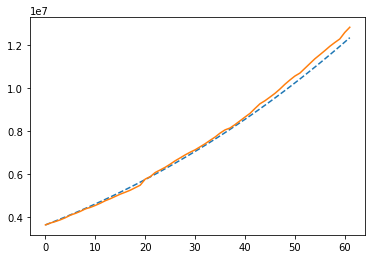

In [63]:
poly_pred_r = lr_r.predict(X_test_poly_r)
plt.plot(poly_pred_r, linestyle = 'dashed')
plt.plot(Y_test_r)

In [64]:
print('MAE:', mean_absolute_error(poly_pred_r, Y_test_r))
print('MSE:', mean_squared_error(poly_pred_r, Y_test_r))
print('RMSE:', np.sqrt(mean_absolute_error(poly_pred_r, Y_test_r)))

MAE: 152835.69117516204
MSE: 39621866835.05734
RMSE: 390.94205603281165


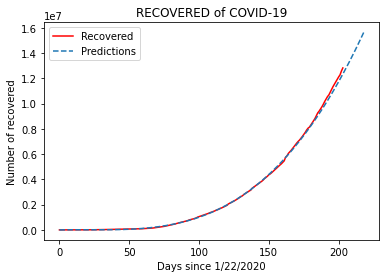

In [65]:
X_train_all_r = poly_r.transform(forecast_r)
pred_all_r = lr_r.predict(X_train_all_r)

plt.plot(forecast_r[:-15], y_r, color='red')
plt.plot(forecast_r, pred_all_r, linestyle='dashed')
plt.title('RECOVERED of COVID-19')
plt.xlabel('Days since 1/22/2020')
plt.ylabel('Number of recovered')
plt.legend(['Recovered', 'Predictions']);

# CONCLUSIONS: 
COVID-19 is a new virus and there are still many things to research and deepen, with these results we realized that luckily there are more cured than dead but there are no predictions for a drop in the number of dead and confirmed. Although there are people in the risk group who are contaminated, the results showed that a large part of those currently being contaminated are young. Even though the peak is among the elderly aged 60 to 70 years. It is worth mentioning that many of these young people may be infected but asymptomatic, which aggravates the situation of those who have agreed with these asymptomatic young people and may have been infected. Many countries do not have the best healthcare network and treatment conditions:

* lack of professionals
* lack of suitable materials
* problems with testing

The poor conditions of the health system lead to the prediction of the increase in deaths, as well as many countries that did not adhere to the quarantine, some are in the process of resuming and have already made the quarantine more flexible, which may corroborate to keep the increasing number of contaminated.